In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('dava.csv')
data

In [ ]:
X = data[["Case Duration (Days)", "Number of Witnesses", 
        "Legal Fees (USD)", "Number of Evidence Items", "Severity"]]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Özellikler farklı ölçü birimlerinde olduğundan (StandardScaler) ile standartlaştırıldı.
Bu, K-Means algoritmasının tüm değişkenleri eşit şekilde değerlendirmesini sağlar.

In [ ]:
inertia = []
K = range(1, 11)

1’den 10’a kadar küme sayıları için inertia hesaplandı.
Grafikte “dizginin kırıldığı” nokta gözlemlendi ve optimal küme sayısı 3 olarak belirlendi.

In [ ]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'o-')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.title("Elbow Yöntemi")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
data["Cluster"] = kmeans.fit_predict(X_scaled)

1’den 10’a kadar küme sayıları için inertia hesaplandı.
Grafikte “dizginin kırıldığı” nokta gözlemlendi ve optimal küme sayısı 3 olarak belirlendi.

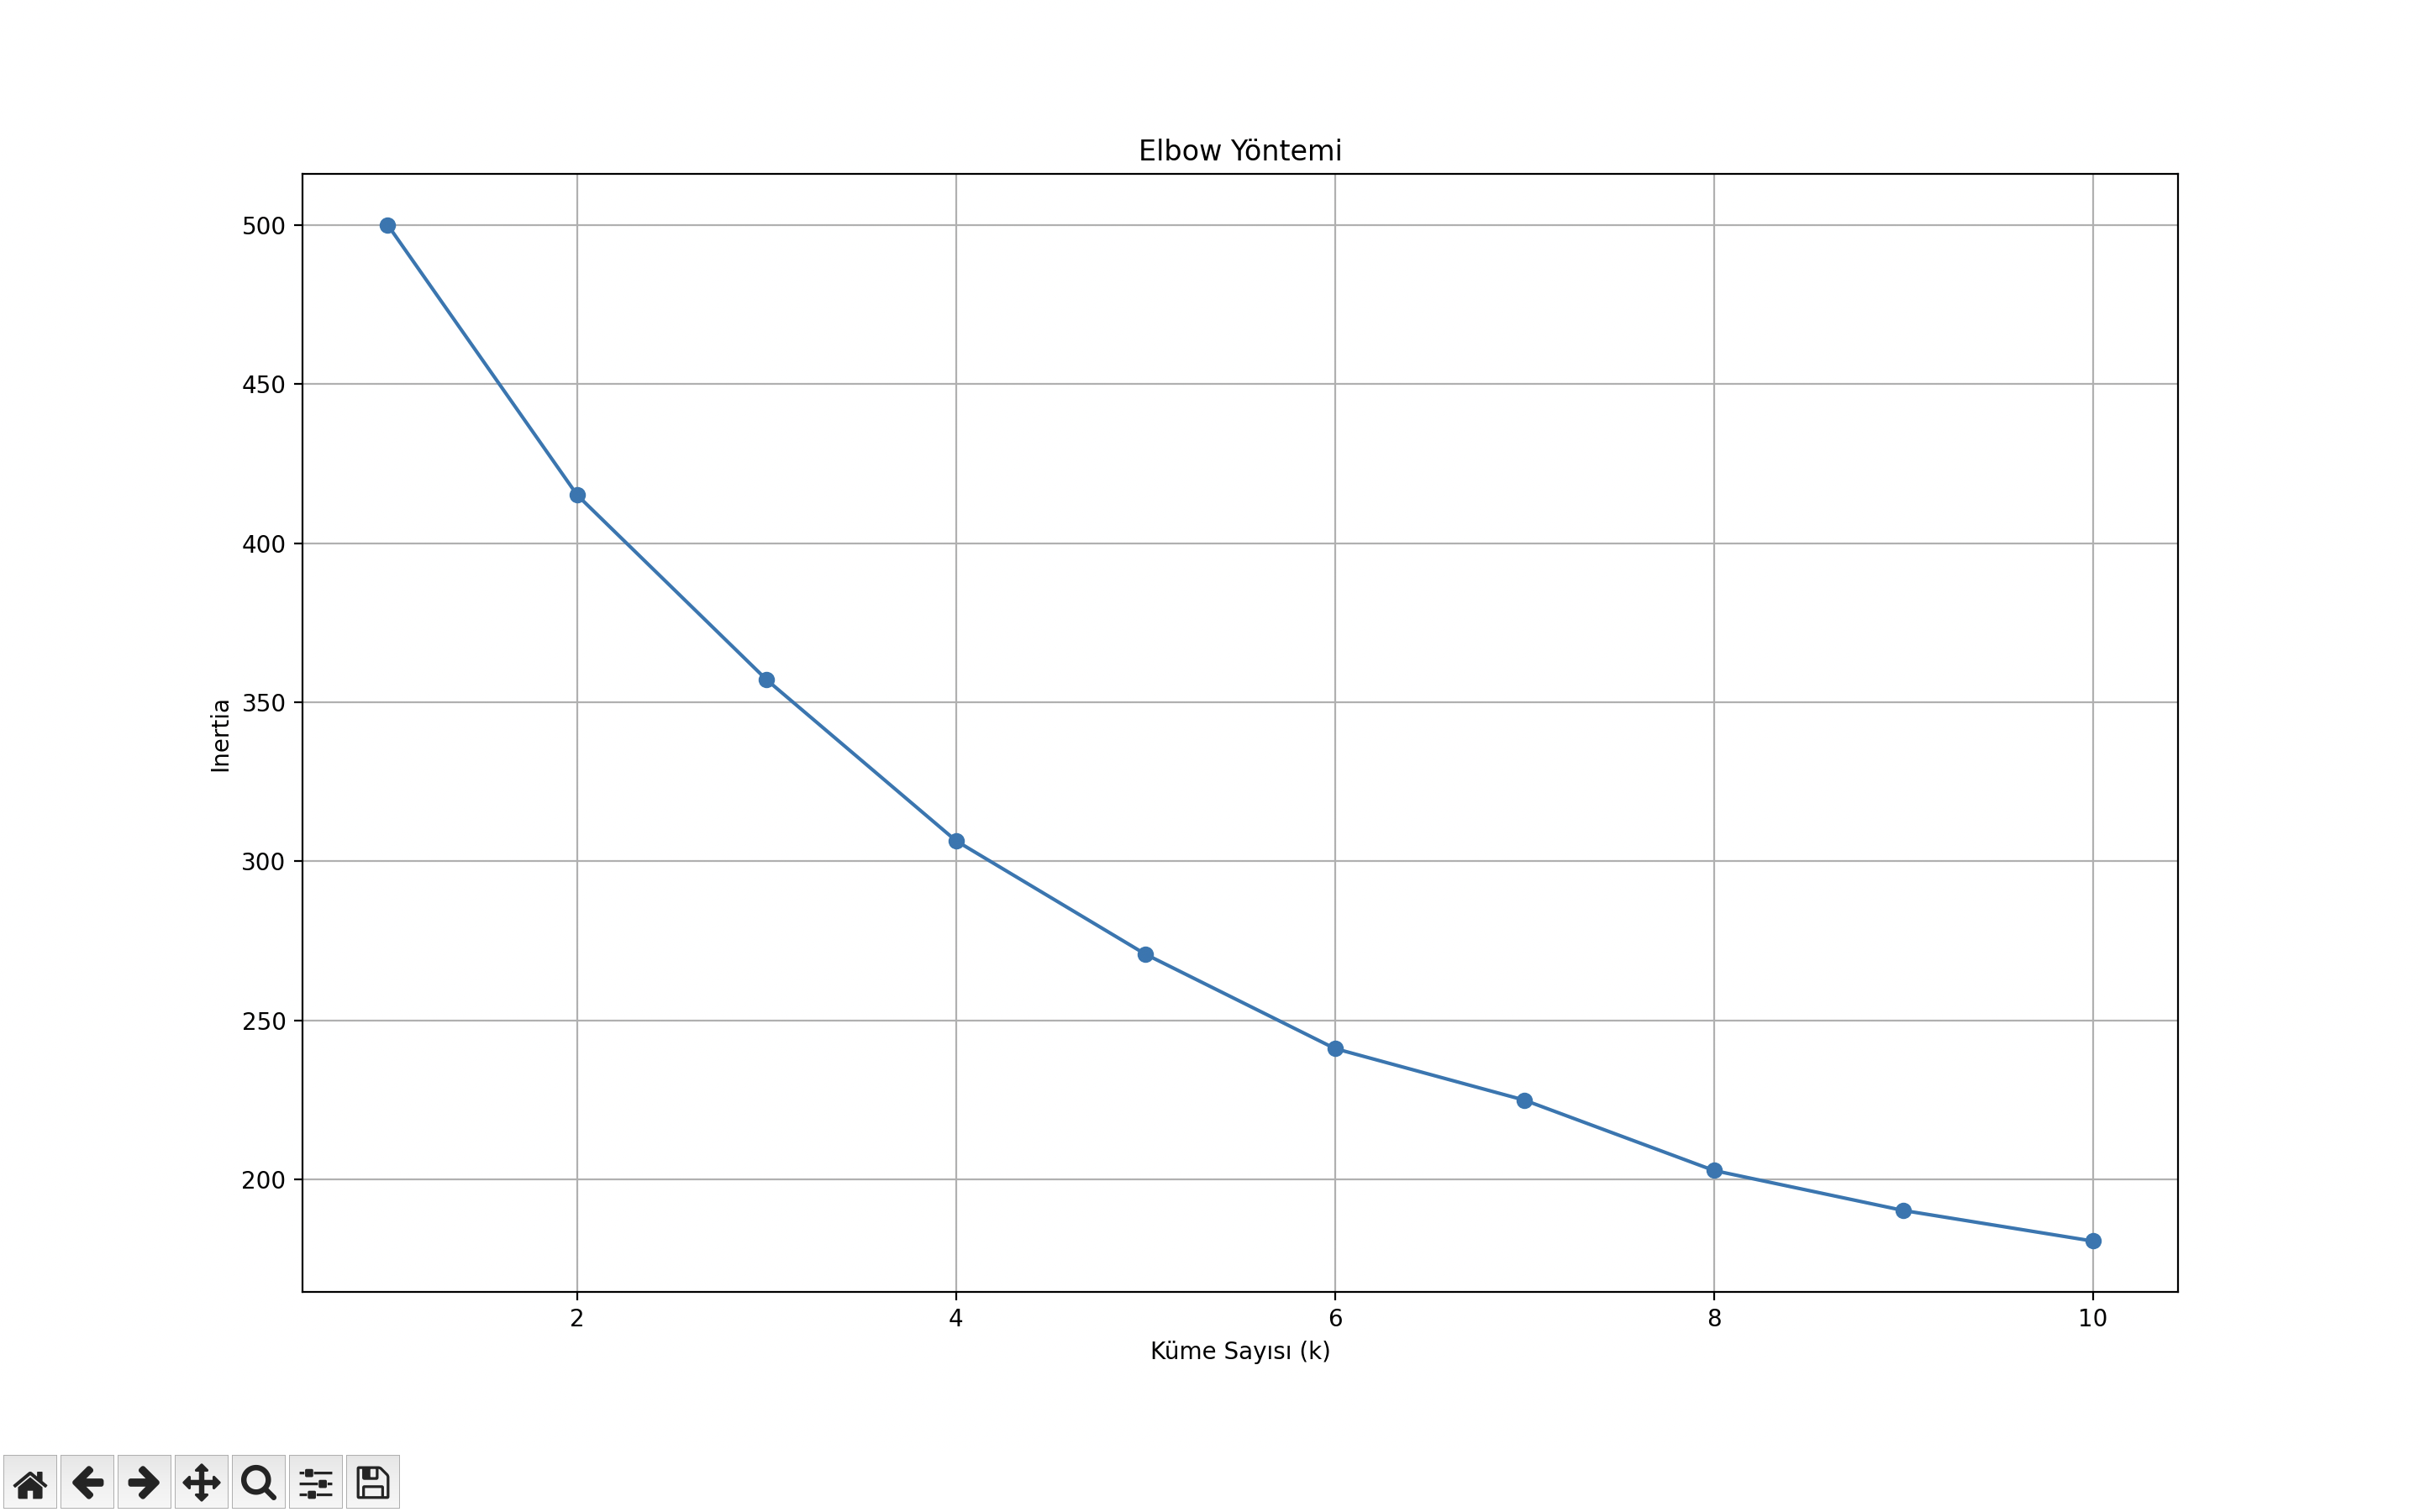

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

PCA kullanılarak veriler 2 boyuta indirildi ve kümeler görselleştirildi.
Grafik, kümeler arasındaki farkları ve dağılımları kolayca göstermektedir.
Farklı renkler, her bir kümenin hangi davaları içerdiğini görsel olarak ifade eder.

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Kümeleme Sonucu (PCA ile 2D)")
plt.colorbar(label="Cluster")
plt.show()

PCA kullanılarak veriler 2 boyuta indirildi ve kümeler görselleştirildi.
Grafik, kümeler arasındaki farkları ve dağılımları kolayca göstermektedir.
Farklı renkler, her bir kümenin hangi davaları içerdiğini görsel olarak ifade eder.

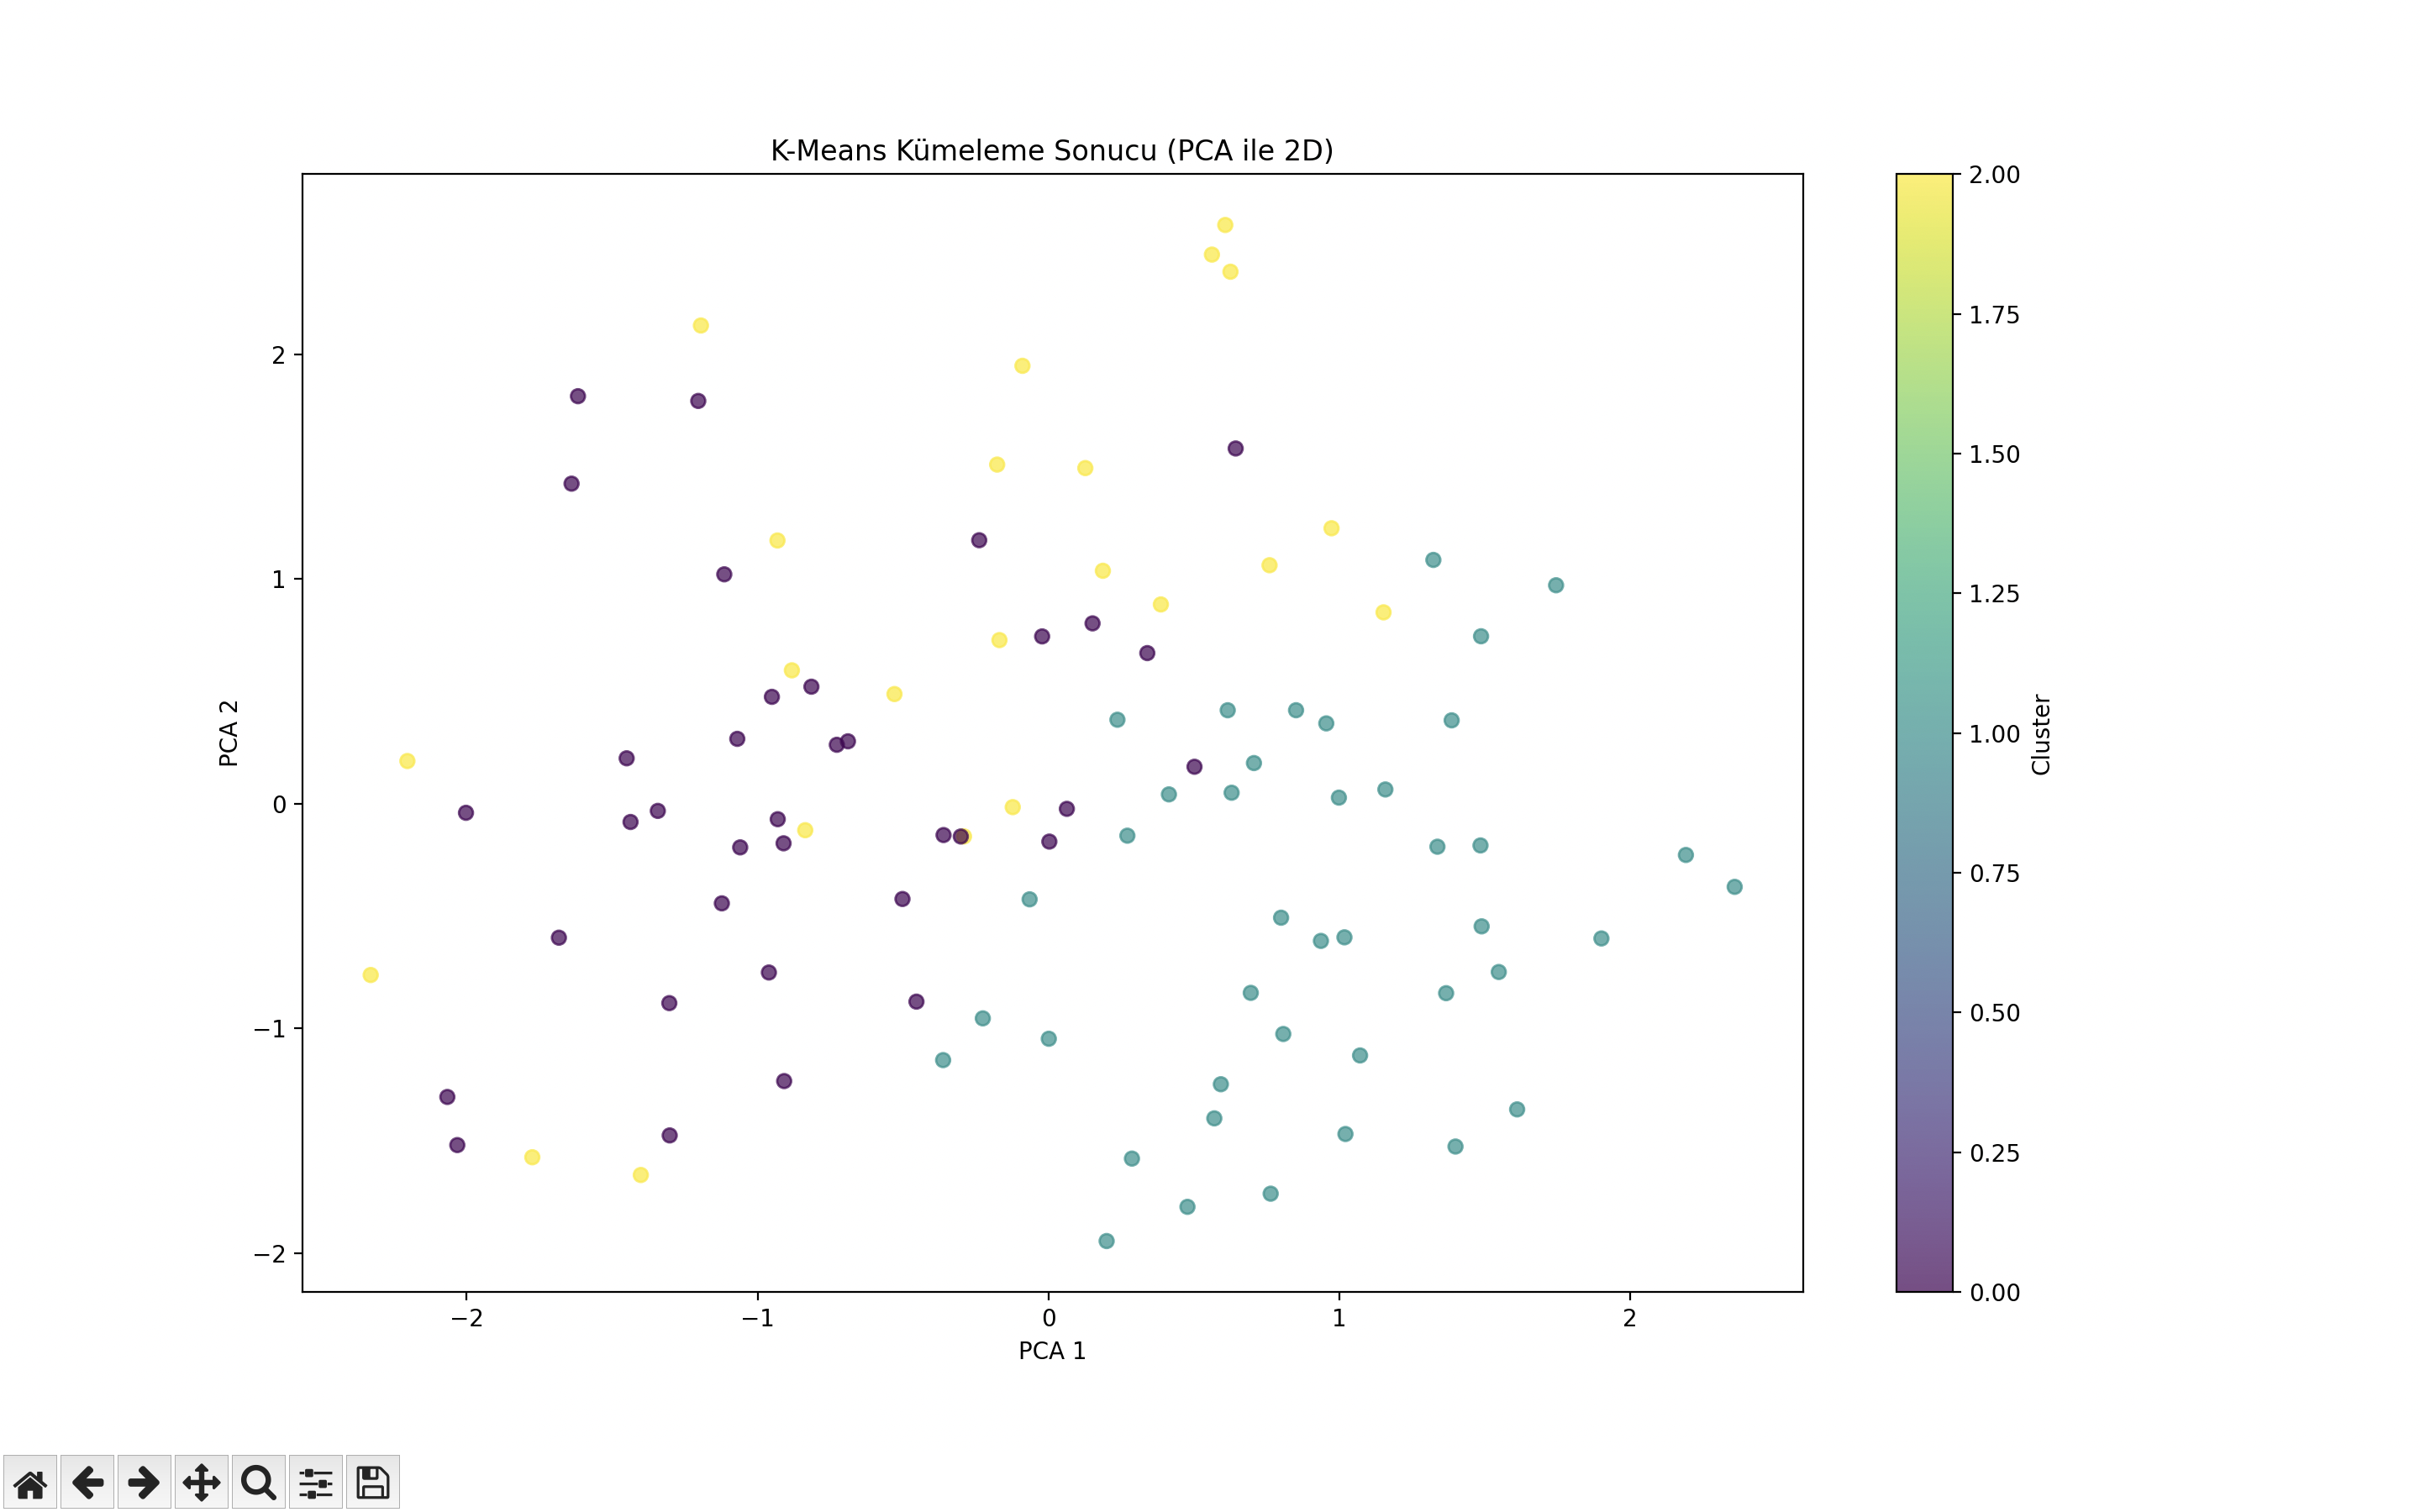

In [ ]:
print("Küme Merkezleri (orijinal ölçekte):")
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(centers, columns=X.columns))

Küme merkezleri orijinal ölçekte hesaplandı ve tablo halinde gösterildi.
Bu merkezler, her kümenin ortalama dava süresi, tanık sayısı, masraflar, delil sayısı ve şiddet seviyesi gibi karakteristiklerini özetler.
Analiz, davaları benzer özelliklerine göre gruplandırarak hangi tür davaların birbirine yakın olduğunu anlamamıza yardımcı olur.